In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
RESULT = './results/test/'

In [48]:
dft_cr01 = pd.read_csv(RESULT+'maze-ppo-CR01test_metrics.csv')

dft_wrgrr5_x = pd.read_csv(RESULT+'maze-ppo-WRGRR5-Xtest_metrics.csv')

dft_nrgrr4 = pd.read_csv(RESULT+'maze-ppo-NRGRR4test_metrics.csv')
dft_wrgrr4 = pd.read_csv(RESULT+'maze-ppo-WRGRR4test_metrics.csv')

dft_nrgrr5 = pd.read_csv(RESULT+'maze-ppo-NRGCRR5test_metrics.csv')
dft_wrgrr5 = pd.read_csv(RESULT+'maze-ppo-WRGRR5test_metrics.csv')

dft_wrgc2r3 = pd.read_csv(RESULT+'maze-ppo-WRGC2R3test_metrics.csv')
dft_wrgc2r3_1 = pd.read_csv(RESULT+'maze-ppo-WRGC2R3.1test_metrics.csv')
dft_nrgc2r3 = pd.read_csv(RESULT+'maze-ppo-NRGC2R3test_metrics.csv')
dft_nrgc2r3_1 = pd.read_csv(RESULT+'maze-ppo-NRGC2R3.1test_metrics.csv')
dft_nrgc1r3 = pd.read_csv(RESULT+'maze-ppo-NRGC1R3test_metrics.csv')
dft_nrgc1r3_1 = pd.read_csv(RESULT+'maze-ppo-NRGC1R3.1test_metrics.csv')
dft_nfgc1r3 = pd.read_csv(RESULT+'maze-ppo-NFGC1R3test_metrics.csv')
dft_nfgc1r3_1 = pd.read_csv(RESULT+'maze-ppo-NFGC1R3.1test_metrics.csv')
dft_wrgc1r3 = pd.read_csv(RESULT+'maze-ppo-WRGC1R3test_metrics.csv')
dft_wrgc1r3_1 = pd.read_csv(RESULT+'maze-ppo-WRGC1R3.1test_metrics.csv')

In [49]:
df01 = dft_wrgrr5_x
df02 = dft_wrgrr4

In [50]:
df01

,episode,reward_total,length,terminated,truncated,path_length,num_wall,num_start,num_end,iterations,changes,max_iterations,max_changes
0,0,-1078.0,360,False,True,-1,9,4,1,360,1,360,10
1,1,-1434.0,360,False,True,-1,10,2,2,360,2,360,10
2,2,-720.0,360,False,True,4,6,1,1,360,0,360,10
3,3,-1079.0,360,False,True,-1,10,0,1,360,1,360,10
4,4,-1434.0,360,False,True,-1,12,3,0,360,2,360,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,-1428.0,360,False,True,-1,16,2,2,360,6,360,10
996,996,-1440.0,360,False,True,-1,6,2,0,360,0,360,10
997,997,-1426.0,360,False,True,-1,9,2,0,360,5,360,10
998,998,-1434.0,360,False,True,-1,18,0,3,360,3,360,10


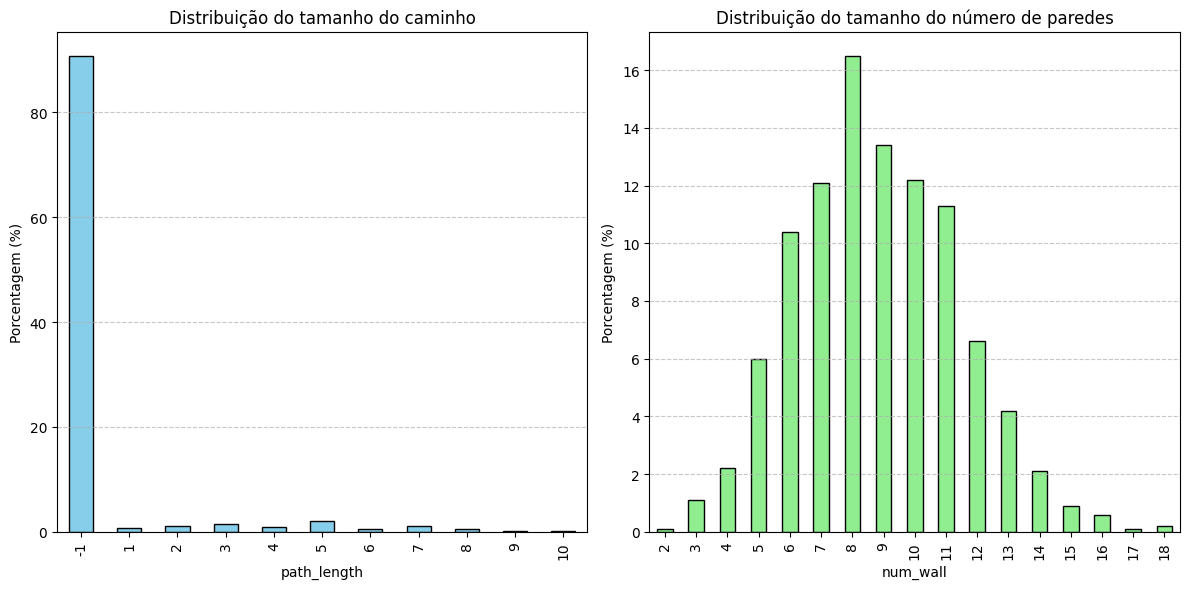

In [51]:
# Calcular porcentagens
#counts1 = df01['iterations'].value_counts(normalize=True) * 100
#counts2 = df['terminated'].value_counts(normalize=True) * 100
counts1 = df01['path_length'].value_counts(normalize=True) * 100
counts2 = df01['num_wall'].value_counts(normalize=True) * 100

# Ordenar os valores pelo índice
counts1 = counts1.sort_index()
counts2 = counts2.sort_index()
#counts3 = counts3.sort_index()

# Criar subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar cada gráfico em um subplot diferente
counts1.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribuição do tamanho do caminho')
axes[0].set_ylabel('Porcentagem (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

counts2.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Distribuição do tamanho do número de paredes')
axes[1].set_ylabel('Porcentagem (%)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.savefig('thesis/imagens/w5-x')
plt.show()


In [40]:
df1 = pd.read_csv('./results/maze-ppo-WRGRR5-X/training_metrics.csv')
#df2 = pd.read_csv('./results/maze-ppo-CR05/training_metrics.csv')
#df3 = pd.read_csv('./results/maze-ppo-CR10/training_metrics.csv')

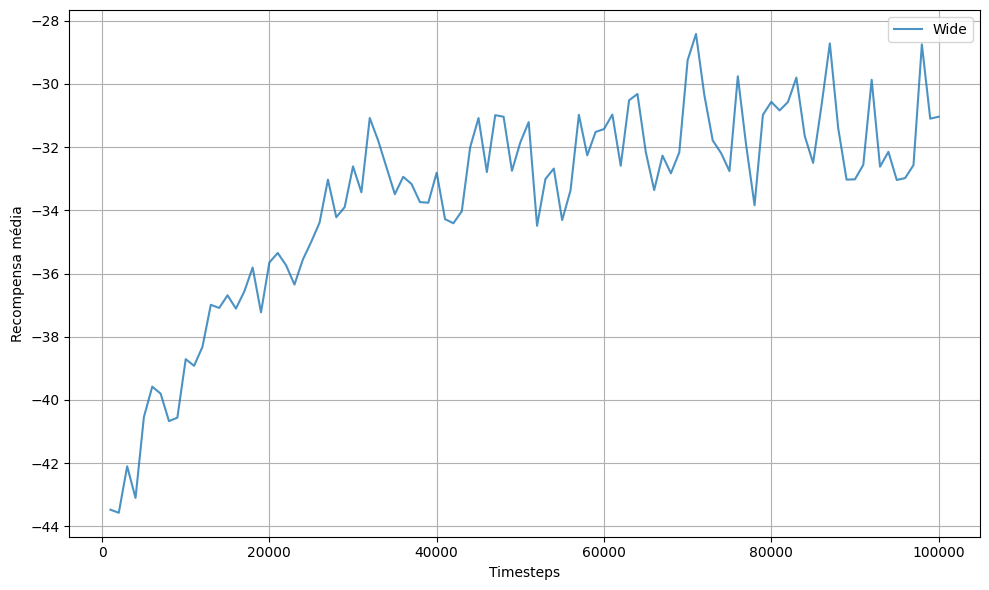

In [41]:
plt.figure(figsize=(10, 6))

plt.plot(df1['timesteps'], df1['mean_reward'], label='Wide', alpha=0.8)
#plt.plot(df2['timesteps'], df2['mean_reward'], label='Change: 0.5', alpha=0.8)
#plt.plot(df3['timesteps'], df3['mean_reward'], label='Change; 1.0', alpha=0.8)

plt.xlabel('Timesteps')
plt.ylabel('Recompensa média')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('thesis/imagens/r5-X')
plt.show()

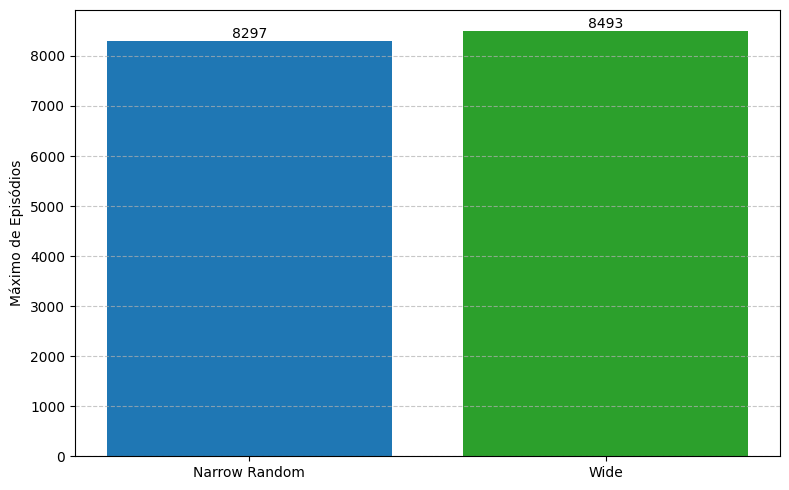

In [83]:
sums = {
    'Narrow Random': df2['episodes'].max(),
    'Wide': df3['episodes'].max()
}

plt.figure(figsize=(8, 5))
bars = plt.bar(sums.keys(), sums.values(), color=['#1f77b4', '#2ca02c', '#d62728'])

# Adicionar os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X central da barra
        height,                             # Posição Y (altura da barra)
        f'{int(height)}',                   # Texto com valor inteiro
        ha='center', va='bottom'            # Alinhamento horizontal e vertical
    )

plt.ylabel('Máximo de Episódios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('thesis/imagens/el_c2r3_1')
plt.show()

In [84]:
df2

,timesteps,episodes,avg_steps_per_episode,mean_reward,best_mean_reward,step_duration
0,1000,48,20.604167,-23.166667,-inf,4.245127
1,2000,100,19.940000,-21.950000,-23.166667,2.367179
2,3000,157,19.063694,-18.410000,-21.950000,3.350271
3,4000,214,18.663551,-16.460000,-18.410000,2.084776
4,5000,278,17.946043,-13.470000,-16.460000,3.395062
...,...,...,...,...,...,...
95,96000,7954,12.068645,-2.210000,-2.380000,2.185884
96,97000,8037,12.067687,-3.570000,-2.210000,3.431974
97,98000,8124,12.061423,-3.170000,-2.210000,2.184629
98,99000,8211,12.056753,-3.180000,-2.210000,3.485964
